### Adaptive Boosting

#### Load Dataset and packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report

df = pd.read_csv('data-iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


#### Seperate the feature and target variables

In [2]:
X = df.loc[:, df.columns != 'species']
y = df['species']

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30)
adaModel = AdaBoostClassifier(n_estimators=150, learning_rate=1) # n_estimators = number of weak learner, 
                                                                 # learning_rate = assign weight to weak learner, default is 1      
adaModel.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=1, n_estimators=150)

##### Prediction

In [4]:
y_pred = adaModel.predict(X_test)
y_pred

array(['versicolor', 'versicolor', 'setosa', 'virginica', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'virginica',
       'versicolor', 'versicolor', 'versicolor', 'setosa', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'setosa', 'virginica', 'virginica', 'virginica',
       'virginica', 'setosa', 'versicolor', 'virginica', 'setosa',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'virginica',
       'versicolor', 'setosa', 'setosa', 'versicolor', 'versicolor',
       'versicolor', 'virginica', 'setosa', 'setosa', 'setosa',
       'versicolor', 'virginica'], dtype=object)

#### Check the Accuracy

In [5]:
print('Classification Report\n:', classification_report(y_test, y_pred))
print('\n Accuracy Score:{0:.4f}'.format(accuracy_score(y_test, y_pred)))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))

Classification Report
:               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.95      0.84      0.89        25
   virginica       0.69      0.90      0.78        10

    accuracy                           0.89        45
   macro avg       0.88      0.91      0.89        45
weighted avg       0.91      0.89      0.89        45


 Accuracy Score:0.8889
Confusion Matrix:
 [[10  0  0]
 [ 0 21  4]
 [ 0  1  9]]


#### Feature Importance 

In [6]:
feature_importance = adaModel.feature_importances_
feature_importance

array([0.        , 0.        , 0.50666667, 0.49333333])

##### Plot feature importance

In [23]:
feature_importance = 100.0 * (feature_importance / feature_importance.max())
feature_importance

array([  0.        ,   0.        , 100.        ,  97.36842105])

In [25]:
sorted_ids = np.argsort(feature_importance)
sorted_ids

array([0, 1, 3, 2], dtype=int64)

In [27]:
pos = np.arange(sorted_ids.shape[0])+.5
pos

array([0.5, 1.5, 2.5, 3.5])

Text(0.5, 0, 'Relative Importance')

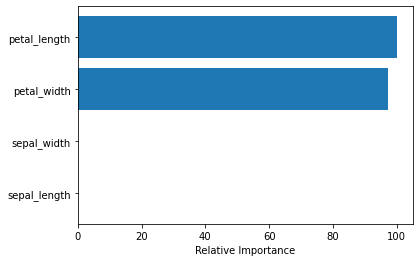

In [31]:
plt.barh(pos, feature_importance[sorted_ids], align='center')
plt.yticks(pos, X.columns[sorted_ids])
plt.xlabel('Relative Importance')
